# 线性回归（多变量）
房价预测。
ex1data2.txt：面积、卧室数、房价

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/ljl/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 代价函数

![](img/cost.png)

In [2]:
# 代价函数
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

## 梯度下降

![](img/gradient.png)

In [3]:
# 梯度下降
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - Y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - alpha / len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    
    return theta, cost

In [4]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
# 保存mean、std、mins、maxs、data
means = data.mean().values
stds = data.std().values
mins = data.min().values
maxs = data.max().values
data_ = data.values
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [6]:
# 特征缩放
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
# add ones column
data.insert(0, 'Ones', 1)

In [8]:
# set X (training data) and Y (target variable)
cols = data.shape[1]
X = data.iloc[:, :cols-1]
Y = data.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0, 0]))

# perform linear regression on the data set
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)

# get the cost(error) of the model
computeCost(X, Y, g)

np.float64(0.13070336960771892)

In [9]:
g

matrix([[-1.10898288e-16,  8.78503652e-01, -4.69166570e-02]])

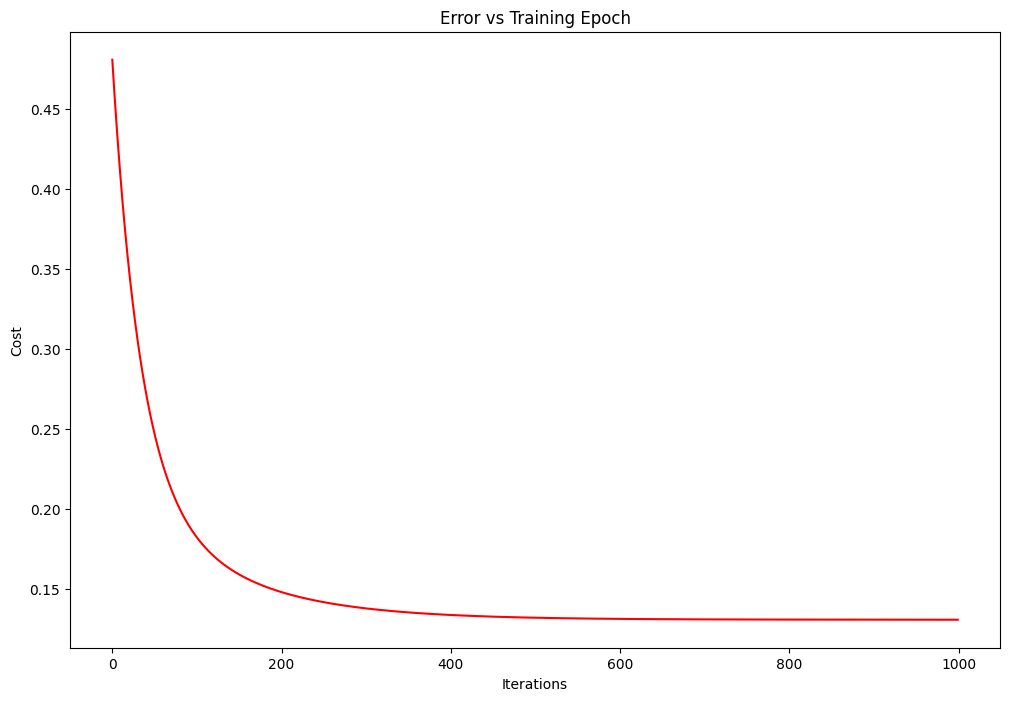

In [10]:
# 画出cost图像
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
plt.show()

## 参数转化为缩放前

In [11]:
def theta_transform(theta, means, stds):
    temp = means[:-1] * theta[1:] / stds[:-1]
    theta[0] = (theta[0] - np.sum(temp)) * stds[-1] + means[-1]
    theta[1:] = theta[1:] * stds[-1] / stds[:-1]
    return theta.reshape(1, -1)

In [12]:
g_ = np.array(g.reshape(-1, 1))
means = means.reshape(-1, 1)
stds = stds.reshape(-1, 1)
transform_g = theta_transform(g_, means, stds)
transform_g

array([[88307.21151185,   138.22534685, -7709.05876589]])

In [13]:
# 预测价格
def predictPrice(x, y, theta):
    return theta[0, 0] + theta[0, 1]*x + theta[0, 2]*y

# 2104,3,399900, 
price = predictPrice(2104, 3, transform_g)
price

np.float64(356006.16498795623)

In [14]:
# 画出拟合平面
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X_ = np.arange(mins[0], maxs[0]+1, 1)
Y_ = np.arange(mins[1], maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_, Y_)
Z_ = transform_g[0,0] + transform_g[0,1] * X_ + transform_g[0,2] * Y_

# 手动设置角度
ax.view_init(elev=25, azim=125)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')

ax.scatter(data_[:, 0], data_[:, 1], data_[:, 2])
plt.show()
# print(data2_, data2_.shape, type(data2_))

ImportError: cannot import name 'docstring' from 'matplotlib' (/home/ljl/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

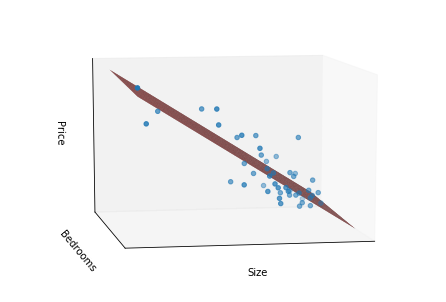

In [ ]:
# jupyter不能调角度...
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X_ = np.arange(mins[0], maxs[0]+1, 1)
Y_ = np.arange(mins[1], maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_, Y_)
Z_ = transform_g[0,0] + transform_g[0,1] * X_ + transform_g[0,2] * Y_

# 手动设置角度
ax.view_init(elev=10, azim=80)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')

ax.scatter(data_[:, 0], data_[:, 1], data_[:, 2])
plt.show()